In [12]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [13]:
data = pd.read_csv('Heart.csv')

data.describe()
data = data.fillna(data.mean())


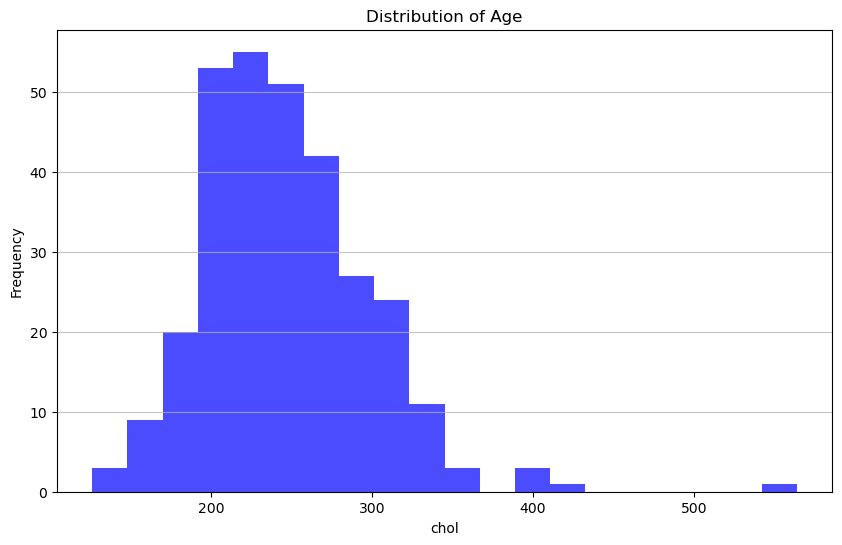

In [14]:
plt.figure(figsize=(10, 6))  
plt.hist(data['chol'], bins=20, color='blue', alpha=0.7)  
plt.title('Distribution of Age')  
plt.xlabel('chol')  
plt.ylabel('Frequency')  
plt.grid(axis='y', alpha=0.75)  
plt.show()

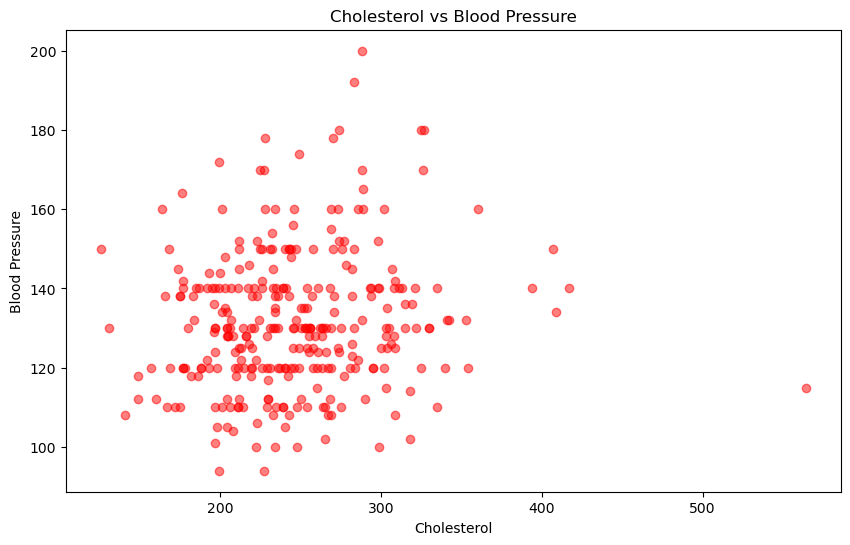

In [15]:
plt.figure(figsize=(10, 6))  
plt.scatter(data['chol'], data['trtbps'], alpha=0.5, color='red')  
plt.title('Cholesterol vs Blood Pressure')  
plt.xlabel('Cholesterol')  
plt.ylabel('Blood Pressure')  
plt.show()

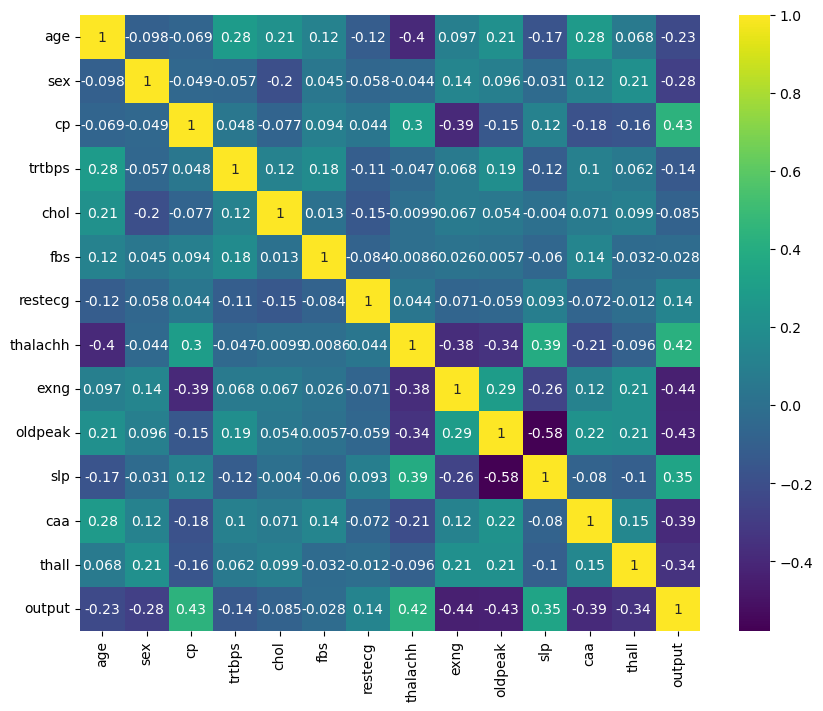

In [16]:
import seaborn as sns

correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.show()

In [17]:
data.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [18]:
X = data.drop('output', axis=1)
y = data['output']


In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y ,test_size=0.2 )
print(X_train.shape , y_train.shape) 
print(X_test.shape , y_test.shape)

(242, 13) (242,)
(61, 13) (61,)


In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
heart_Tree_entropy = DecisionTreeClassifier(criterion='entropy' , max_depth =4)
heart_Tree_entropy.fit(X_train , y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [22]:
heart_Tree_gini = DecisionTreeClassifier(criterion='gini' , max_depth =4)
heart_Tree_gini.fit(X_train , y_train)

DecisionTreeClassifier(max_depth=4)

In [29]:
from sklearn import metrics
yPredict_entropy = heart_Tree_entropy.predict(X_test)
yPredict_gini = heart_Tree_gini.predict(X_test)

print('acc entropy : ' , metrics.accuracy_score(y_test , yPredict_entropy))
print('acc gini : ' , metrics.accuracy_score(y_test , yPredict_entropy)) 
print("-----------------------------------------------------------------------------")

#classification report 

print('classification report entropy :\n\n ' , metrics.classification_report(y_test , yPredict_entropy))
print("-----------------------------------------------------------------------------")
print('classification report gini :\n\n ' , metrics.classification_report(y_test , yPredict_gini))

acc entropy :  0.7213114754098361
acc gini :  0.7213114754098361
-----------------------------------------------------------------------------
classification report entropy :

                precision    recall  f1-score   support

           0       0.65      0.62      0.64        24
           1       0.76      0.78      0.77        37

    accuracy                           0.72        61
   macro avg       0.71      0.70      0.71        61
weighted avg       0.72      0.72      0.72        61

-----------------------------------------------------------------------------
classification report gini :

                precision    recall  f1-score   support

           0       0.67      0.58      0.62        24
           1       0.75      0.81      0.78        37

    accuracy                           0.72        61
   macro avg       0.71      0.70      0.70        61
weighted avg       0.72      0.72      0.72        61

